# Sample Project 1
# Titanic Survial Analysis

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style('whitegrid')
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## Questions

1. who are the passengers on the Titanic? (Age, Gender, Class..)
2. what deck were the passengers on and how does that related to their class?
3. where did the passengers come from
4. who was alone and who was with family

Then:
5. what factors helped someone survied the sinking?

In [4]:
## Make a column for child 

In [5]:
def isChild(Ser_Age,Ser_Sex):
    boolean = Ser_Age < 15
    return np.where(boolean,["child"]*len(boolean),Ser_Sex)

titanic["Person"] = isChild(titanic.Age,titanic.Sex)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


### Sex information 

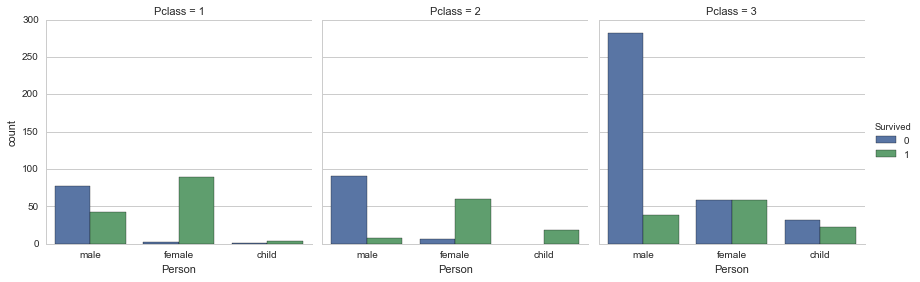

In [6]:
g0 = sns.factorplot(x="Person",data=titanic,kind="count",hue="Survived",col="Pclass",col_order=[1,2,3])

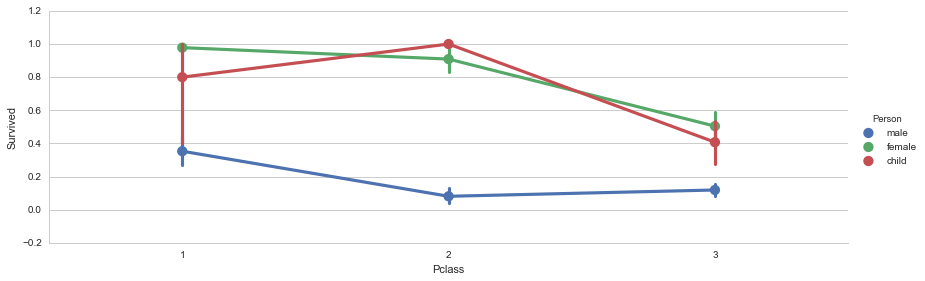

In [7]:
sns.factorplot(x="Pclass",y="Survived",data=titanic,hue='Person',aspect=3,order=[1,2,3])

The above figures shows several interesting facts:
    1. Most of the males are in the 3rd class; Males had a better chance in the 3rd class.
    2. Females are more likely to survial than males in all class level.
    3. Most Children are in the 3rd class, children in the 2nd class had the highest survival rate

### Age information

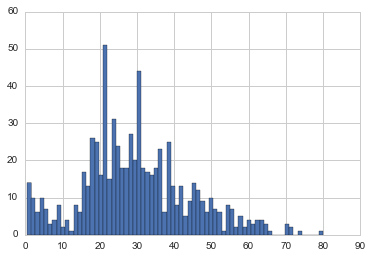

In [8]:
titanic.Age.hist(bins=70)

In [9]:
# shows mean age
titanic.Age.mean()

29.69911764705882

In [10]:
# Population counts
titanic.Person.value_counts()

male      538
female    275
child      78
Name: Person, dtype: int64

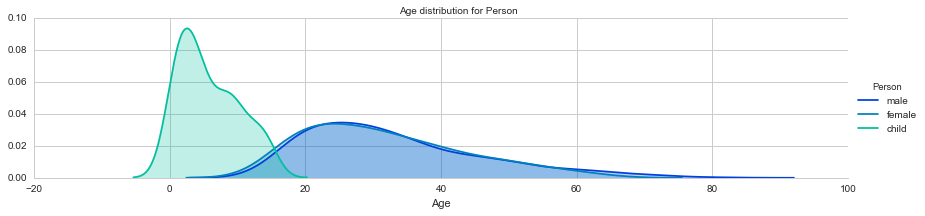

In [11]:
g1 = sns.FacetGrid(titanic,hue="Person",palette="winter",aspect=4)
g1.map(sns.kdeplot,"Age",shade=True)
g1.fig.suptitle("Age distribution for Person")
g1.add_legend()

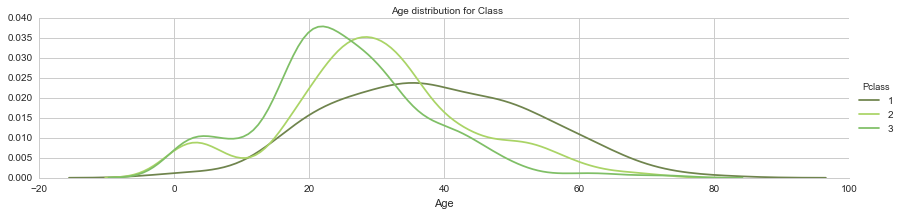

In [12]:
g2 = sns.FacetGrid(titanic,hue="Pclass",palette="summer_d",aspect=4)
g2.map(sns.kdeplot,"Age")
g2.fig.suptitle("Age distribution for Class")
g2.add_legend()

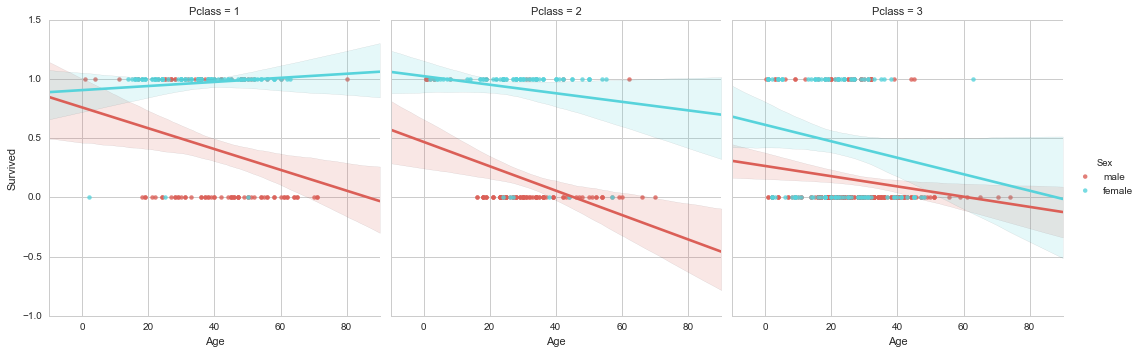

In [13]:
g3 = sns.lmplot("Age","Survived",titanic,hue="Sex",palette="hls",col="Pclass")

## Deck information

In [14]:
# drop missing data
deck = titanic.Cabin.dropna()

In [15]:
# reshaping deck information
deck = [i[0] for i in deck]

In [16]:
# create new Data Frame
Cabin_df = DataFrame(deck)
Cabin_df.columns=["Cabin"]

In [17]:
Cabin_df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [18]:
# cleansing up
Cabin_df = Cabin_df[~(Cabin_df.Cabin=="T")]

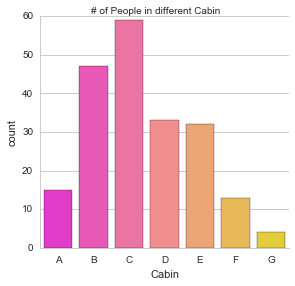

In [19]:
g4 = sns.factorplot(x="Cabin",data=Cabin_df,kind="count",palette="spring",order=np.sort(Cabin_df.Cabin.unique()))
g4.fig.suptitle("# of People in different Cabin")

In [20]:
# combine the Cabin information with the titanic data frame
new_df = Cabin_df.combine_first(titanic)

In [21]:
new_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Person,Sex,SibSp,Survived,Ticket
0,22,C,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,male,1,0,A/5 21171
1,38,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,female,1,1,PC 17599
2,26,E,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,female,0,1,STON/O2. 3101282
3,35,G,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,female,1,1,113803
4,35,C,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,male,0,0,373450


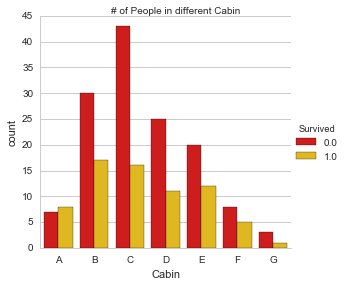

In [22]:
g5 = sns.factorplot(x="Cabin",data=new_df,kind="count",palette="hot",order=np.sort(Cabin_df.Cabin.unique()),hue="Survived")
g5.fig.suptitle("# of People in different Cabin")

In [23]:
new_df[new_df.Cabin=="A"].Pclass.value_counts()

3    10
1     3
2     2
Name: Pclass, dtype: int64

From the information above:
        Decks doesn't have anything to do with the survival rate

## Alone or with families

In [24]:
titanic["Companians"] = np.sign(titanic.SibSp + titanic.Parch)

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Companians
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


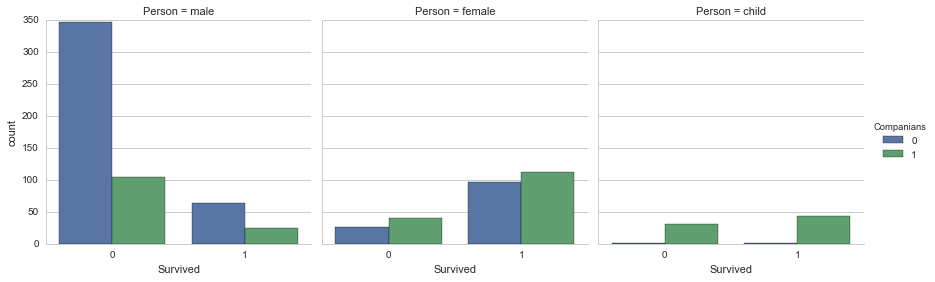

In [26]:
g6 = sns.factorplot(x="Survived",data=titanic,kind="count",col="Person",hue="Companians")

Companians didn't make a difference in the survival rate